In [1]:
'''
Population data from FRED API

'''

import requests
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('seaborn-whitegrid')
import numpy as np
import os
from dateutil import parser
from collections import defaultdict

In [2]:

def do_series_search(search_data):
    '''
    Does a search of FRED data series
    INPUT: data to seach (list of strings)
    OUTPUT: json results from FRED
    '''
    fred_search_url = 'https://api.stlouisfed.org/fred/series/search?api_key=4a35874b8a4526dd50b390e46f396651&search_text={0}&file_type=json'  
    if type(search_data) != type(list):
        search_data = [search_data]
    search_string = '+'.join([x.lower() for x in search_data])
    print(search_string)
    fred_response = requests.get(fred_search_url.format(search_string))
    result = fred_response.json()
    return result
    
def get_series(series_id):
    '''
    Fetches FRED data series
    INPUT: data to seach (list of strings)
    OUTPUT: json results from FRED
    '''
    fred_series_fetch_url = 'https://api.stlouisfed.org/fred/series/observations?series_id={0}' + \
'&api_key=4a35874b8a4526dd50b390e46f396651&file_type=json'
    fred_response = requests.get(fred_series_fetch_url.format(series_id))
    result = fred_response.json()
    #print(result)
    return result 


def get_population_data(country):
    '''
    Get Poplatation data from FRED
    INPUT: Country (String)
    OUTPUT: dictionary of data 
    '''
    population_titles_of_interest = [
    'Employment to Population Ratio for',
    'Age Dependency Ratio: Older Dependents to Working-Age Population for',
    'Population Ages 15 to 64 for',
    'Population, Total for',
    'Population'
    ]

    search_string = country.lower()
    
    country_series  = do_series_search(search_string)
    series_ids = {}
    series_notes = {}
    #print(country_series)

    for elem in country_series['seriess']:
        #print(elem)
        for title in population_titles_of_interest:
            #if elem['title'].startswith(title):
            if 'population' in elem['title'].lower():
                series_ids[elem['title']] = elem['id']
                series_notes[elem['title']] = elem['notes']
    print(series_ids)
    ans = {}
    for title, series_id in series_ids.items():
        series = {}
        series_info = get_series(series_id)
        series['title'] = title
        series['units'] = series_info['units']
        series['notes'] = series_notes[title]
        series['dates'] = [x['date'] for x in series_info['observations']]
        series['values'] = [x['value'] for x in series_info['observations']]
        ans[title] = series
    
    return ans


def get_series_info_by_title(title, country):
    '''
    Get series data by specific title
    INPUT: title (str) 
            country (str)
    OUTPUT: series info
    
    '''
    print(title)
    print(country)
    save_country = country
    if country.lower() == 'south korea':
        country = 'republic of korea'
    country_series  = do_series_search(country.lower())
    series_ids = {}
    series_notes = {}
    for elem in country_series['seriess']:
        print(elem['title'] ,elem['frequency'], elem['id'])
        #print(elem)
        if title.lower() == elem['title'].lower():
            if 'frequency' in elem:
                if elem['frequency'].lower() == 'annual':
                    print('found one {0}'.format(title))
                    print(elem)
                    series_ids[elem['title']] = elem['id']
                    series_notes[elem['title']] = elem['notes']
    print('series ids', series_ids)
    ans = {}
    # For some reason cannot generically find us data
    # series_id['population, total for united states'] = 'POPTOTUSA647NWDB'
    # series_notes = {'title':'population, total for united states'}
    for title, series_id in series_ids.items():
        print('search1', title, series_id)
        series = {}
        series_info = get_series(series_id)
        series['title'] = title
        series['units'] = series_info['units']
        series['notes'] = series_notes[title]
        series['dates'] = [x['date'] for x in series_info['observations']]
        series['values'] = [x['value'] for x in series_info['observations']]
        ans[save_country] = series
    return ans
    

        
                
    
    
    

In [3]:
'''
These do not work as the titles vary by country

'''

def get_total_population_data_for_counry_set(country_set):
    '''
    Get total population
    
    '''
    country_set_data = {}
    for country in country_set:
        save_country = country
        country = country.lower()
        title_string = 'population for {0}'.format(country)
        if country.lower() in {'usa', 'united states'}:
            title_string = 'population' 
        print(title_string)
        info = get_series_info_by_title(title_string, save_country)
        country_set_data[save_country] = info
    return country_set_data


'''


'''
def get_working_age_percent_for_country_set(country_set):
    country_set_data = {}
    for country in country_set:
        save_country = country
        country = country.lower()
        title_string = 'population ages 15 to 64 for {0}'.format(country)
        info = get_series_info_by_title(title_string, save_country)
        country_set_data[save_country] = info
    return country_set_data
    
    
    

In [4]:
this_set = get_total_population_data_for_counry_set(['United States'])





population
population
United States
united states
Assets: Total Assets: Total Assets (Less Eliminations From Consolidation): Wednesday Level Weekly, As of Wednesday WALCL
U.S. / Euro Foreign Exchange Rate Daily DEXUSEU
U.S. / Euro Foreign Exchange Rate Monthly EXUSEU
U.S. / Euro Foreign Exchange Rate Annual AEXUSEU
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANS
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCI
Gold Fixing Price 10:30 A.M. (London time) in London Bullion Market, based in U.S. Dollars Daily GOLDAMGBD228NLBM
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCINSA
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANSNSA
Assets: Securities Held Outright: U.S. Treasury Securities: All: Wednesday Level Weekly, As of Wednesday TREAST
10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity Daily T10Y2Y
Consumer Price Index for All Urban Consumers: All I

Hong Kong / U.S. Foreign Exchange Rate Annual AEXHKUS
Producer Price Index by Commodity for Metals and Metal Products: Cold Rolled Steel Sheet and Strip Monthly WPS101707
Malaysia / U.S. Foreign Exchange Rate Monthly EXMAUS
Advance Retail Sales: Retail (Excluding Food Services) Monthly RSXFSN
Total Business: Inventories to Sales Ratio Monthly ISRATIO
Percent Change of Gross Domestic Product Quarterly CPGDPAI
1-Year Treasury Bill: Secondary Market Rate Daily DTB1YR
E-Commerce Retail Sales as a Percent of Total Sales Quarterly ECOMPCTSA
Global price of Rubber Quarterly PRUBBUSDQ
FOMC Summary of Economic Projections for the Fed Funds Rate, Median Annual FEDTARMD
Memorandum Items: Custody Holdings: Marketable U.S. Treasury Securities: Wednesday Level Weekly, As of Wednesday WMTSECL1
Advance Retail Sales: Retail (Excluding Food Services) Monthly MARTSMPCSM44000USS
ICE BofAML US High Yield B Option-Adjusted Spread Daily, Close BAMLH0A2HYB
ICE BofAML Euro High Yield Index Option-Adjusted Spre

Average Weekly Hours of All Employees, Total Private Monthly AWHAETP
All Employees: Government: Federal Monthly CES9091000001
Imports of Goods and Services Quarterly IMPGS
Unemployment Rate: Aged 15-64: All Persons for the United States Monthly LRUN64TTUSM156S
Real Estate Loans, All Commercial Banks Quarterly RELACBQ158SBOG
Consumer Price Index for All Urban Consumers: Food and Beverages in U.S. City Average Monthly CPIFABSL
Personal income per capita Quarterly A792RC0Q052SBEA
Deposits, All Commercial Banks Quarterly DPSACBQ158SBOG
Dow-Jones Industrial Stock Price Index for United States Monthly M1109AUSM293NNBR
Median Household Income in California Annual MEHOINUSCAA646N
Total Construction Spending: Nonresidential Monthly TLNRESCON
Private Residential Fixed Investment Quarterly PRFI
FOMC Summary of Economic Projections for the Growth Rate of Real Gross Domestic Product, Central Tendency, Midpoint Annual GDPC1CTM
4-Week Treasury Bill: Secondary Market Rate Daily DTB4WK
Deposits, All Co

In [5]:
this_set

{'United States': {'United States': {'title': 'Population',
   'units': 'lin',
   'notes': 'Population includes resident population plus armed forces overseas. The annual estimate is constructed as an average of monthly series https://fred.stlouisfed.org/series/POPTHM. \nBEA Account Code: B230RC',
   'dates': ['1929-01-01',
    '1930-01-01',
    '1931-01-01',
    '1932-01-01',
    '1933-01-01',
    '1934-01-01',
    '1935-01-01',
    '1936-01-01',
    '1937-01-01',
    '1938-01-01',
    '1939-01-01',
    '1940-01-01',
    '1941-01-01',
    '1942-01-01',
    '1943-01-01',
    '1944-01-01',
    '1945-01-01',
    '1946-01-01',
    '1947-01-01',
    '1948-01-01',
    '1949-01-01',
    '1950-01-01',
    '1951-01-01',
    '1952-01-01',
    '1953-01-01',
    '1954-01-01',
    '1955-01-01',
    '1956-01-01',
    '1957-01-01',
    '1958-01-01',
    '1959-01-01',
    '1960-01-01',
    '1961-01-01',
    '1962-01-01',
    '1963-01-01',
    '1964-01-01',
    '1965-01-01',
    '1966-01-01',
    '196

In [6]:
country_set = ['China', 'Japan', 'Republic of Korea', 'Germany', 'United States']

In [7]:
total_population_set = get_total_population_data_for_counry_set(country_set)

population for china
population for china
China
china
China / U.S. Foreign Exchange Rate Daily DEXCHUS
China / U.S. Foreign Exchange Rate Monthly EXCHUS
China / U.S. Foreign Exchange Rate Annual AEXCHUS
Gross Domestic Product for China Annual MKTGDPCNA646NWDB
Real GDP at Constant National Prices for China Annual RGDPNACNA666NRUG
Consumer Price Index: All Items for China Monthly CHNCPIALLMINMEI
Current Price Gross Domestic Product in China Quarterly CHNGDPNQDSMEI
Consumer Price Index: All Items for China Quarterly CHNCPIALLQINMEI
Consumer Price Index: All Items for China Annual CHNCPIALLAINMEI
Current Price Gross Domestic Product in China Annual CHNGDPNADSMEI
Constant GDP per capita for China Annual NYGDPPCAPKDCHN
M2 for China Monthly MYAGM2CNM189N
M1 for China Monthly MYAGM1CNM189N
Interest Rates, Discount Rate for China Monthly INTDSRCNM193N
M1 for China Monthly MANMM101CNM189S
Exports: Value Goods for China Monthly XTEXVA01CNM667S
M1 for China Monthly MANMM101CNM657S
M1 for China Mon

Amount Outstanding of International Bonds and Notes for All Issuers, Nationality of Issuer in China (DISCONTINUED) Quarterly IBANAINIAOCN
H-Statistic in Banking Market for China Annual DDOI03CNA066NWDB
Mobile Cellular Subscriptions in China Annual ITCELSETSP2CHN
Share Prices: All shares/broad: Total: Total for China Monthly CHNSPASTT01GYM
Barro-Lee: Population age 25+ with tertiary schooling. Total (Incomplete and Completed Tertiary) for China 5 Year BARTERICMP25UPZSCHN
Price level of Output-side Real GDP at Current Purchasing Power Parities (Purchasing Power Parity/Exchange Rate) for Province of China Taiwan Annual PLGDPOTWA670NRUG
Price Level of the Capital Stock for Province of China Taiwan Annual PLKCPPTWA670NRUG
Use of Financial Services: Key Indicators, Outstanding Loans from Commercial Banks for China, P.R.: Mainland Annual CHNFCSODCGGDPPT
Share of Residual Trade and GDP Statistical Discrepancy at Current Purchasing Power Parities for China Annual CSHRCPCNA156NRUG
Price level of

Number of Identified Exporters to Province of China Taiwan from Georgia Annual GATWNA475SCEN
Number of Identified Exporters to China from Nevada Annual NVCHNA475SCEN
Number of Identified Exporters to China from Maryland Annual MDCHNA475SCEN
Use of Financial Services Deposit Accounts: Accounts at Other Deposit Takers for China, P.R.: Mainland Annual CHNFCAODDNUM
Geographical Outreach: Number of Institutions, Other Depository Corporations for China, P.R.: Mainland Annual CHNFCIODNUM
Business Tendency Surveys for Services: Business Situation Activity: Present: European Commission Indicator for China (DISCONTINUED) Quarterly BVBUCT02CNQ460N
Number of Identified Exporters to China from North Carolina Annual NCCHNA475SCEN
Value of Exports to China from Colorado Annual COCHNA052SCEN
Number of Identified Exporters to Province of China Taiwan from Arizona Annual AZTWNA475SCEN
Value of Exports to Province of China Taiwan from Connecticut Annual CTTWNA052SCEN
Value of Exports to Province of China

population for japan
population for japan
Japan
japan
Japan / U.S. Foreign Exchange Rate Daily DEXJPUS
Japan / U.S. Foreign Exchange Rate Monthly EXJPUS
Japan / U.S. Foreign Exchange Rate Annual AEXJPUS
Bank of Japan: Total Assets for Japan Monthly, End of Period JPNASSETS
Gross Domestic Product for Japan Quarterly JPNNGDP
Gross Domestic Product for Japan Annual MKTGDPJPA646NWDB
Real Gross Domestic Product for Japan Quarterly JPNRGDPEXP
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Monthly IRLTLT01JPM156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Annual IRLTLT01JPA156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Quarterly IRLTLT01JPQ156N
Interest Rates, Discount Rate for Japan Monthly INTDSRJPM193N
Inflation, consumer prices for Japan Annual FPCPITOTLZGJPN
Consumer Price Index of All Items in Japan Monthly JPNCPIALLMINMEI
Working Age Population: Aged 15-64: All Persons for Japan 

Producer Prices Index: Domestic Durable Consumer Goods for Japan Quarterly PITGCD02JPQ661N
Monthly Earnings: Private Sector for Japan Quarterly LCEAPR03JPQ661S
Monthly Earnings: Private Sector for Japan Monthly LCEAPR03JPM661N
Monthly Earnings: Private Sector for Japan Annual LCEAPR03JPA661N
Monthly Earnings: Private Sector for Japan Annual LCEAPR03JPA661S
Monthly Earnings: Private Sector for Japan Quarterly LCEAPR03JPQ661N
Employment Rate: Aged 25-54: Males for Japan Monthly LREM25MAJPM156S
Employment Rate: Aged 25-54: Males for Japan Quarterly LREM25MAJPQ156S
Employment Rate: Aged 25-54: Males for Japan Annual LREM25MAJPA156S
Employment Rate: Aged 25-54: Males for Japan Quarterly LREM25MAJPQ156N
Employment Rate: Aged 25-54: Males for Japan Monthly LREM25MAJPM156N
Capital Accounts and Financial Accounts: Total Balance Including Change in Reserve Assets for Japan (DISCONTINUED) Annual BPCFTT01JPA637N
Capital Accounts and Financial Accounts: Total Balance Including Change in Reserve Ass

Consumer Price Index: Energy for Japan Annual JPNCPIENGAINMEI
Stock Volume of Intermediate Goods for Japan (DISCONTINUED) Quarterly STMNIG01JPQ661N
Stock Volume of Intermediate Goods for Japan (DISCONTINUED) Annual STMNIG01JPA661S
Stock Volume of Intermediate Goods for Japan (DISCONTINUED) Quarterly STMNIG01JPQ661S
Stock Volume of Intermediate Goods for Japan (DISCONTINUED) Annual STMNIG01JPA661N
Monthly Overtime Hours: Manufacturing for Japan Monthly HOOVMN03JPM661N
Monthly Overtime Hours: Manufacturing for Japan Annual HOOVMN03JPA661N
Monthly Overtime Hours: Manufacturing for Japan Quarterly HOOVMN03JPQ661N
Total Production of Investment Goods for Manufacturing for Japan Quarterly PRMNVG01JPQ661S
Total Production of Investment Goods for Manufacturing for Japan Annual PRMNVG01JPA661N
Total Production of Investment Goods for Manufacturing for Japan Annual PRMNVG01JPA661S
Total Production of Investment Goods for Manufacturing for Japan Quarterly PRMNVG01JPQ661N
M3 for Japan (DISCONTINUE

population for republic of korea
population for republic of korea
Republic of Korea
republic of korea
South Korea / U.S. Foreign Exchange Rate Daily DEXKOUS
South Korea / U.S. Foreign Exchange Rate Monthly EXKOUS
South Korea / U.S. Foreign Exchange Rate Annual AEXKOUS
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ189S
Interest Rates, Discount Rate for Republic of Korea Monthly INTDSRKRM193N
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ657S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Annual NAEXKP01KRA661S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Annual NAEXKP01KRA189S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of 

Consumer Price Index: Food for Korea Quarterly KORCPIFODQINMEI
Employment Rate: Aged 15-64: Males for the Republic of Korea Monthly LREM64MAKRM156S
Employment Rate: Aged 15-64: Males for the Republic of Korea Quarterly LREM64MAKRQ156N
Consumer Price Index: OECD Groups: Fuel, Electricity, and Gasoline for the Republic of Korea Quarterly CPGREN01KRQ657N
Current Account Credit: Trade: Total Exports of Goods for the Republic of Korea (DISCONTINUED) Annual BPCRTD01KRA637S
Current Account Credit: Trade: Total Exports of Goods for the Republic of Korea (DISCONTINUED) Quarterly BPCRTD01KRQ637N
Production of Nondurable Consumer Goods for Manufacturing for the Republic of Korea Annual PRMNCG03KRA661N
Production of Nondurable Consumer Goods for Manufacturing for the Republic of Korea Quarterly PRMNCG03KRQ661N
Employment Rate: Aged 25-54: All Persons for the Republic of Korea Monthly LREM25TTKRM156N
Employment Rate: Aged 25-54: All Persons for the Republic of Korea Quarterly LREM25TTKRQ156N
Consum

Leading Indicators OECD: Component series: Terms of trade: Original series for the Republic of Korea Monthly KORLOCOTTORSTSAM
Activity Rate: Aged 55-64: Females for the Republic of Korea Monthly LRAC55FEKRM156S
Benchmarked Unit Labor Costs - Market Services for the Republic of Korea (DISCONTINUED) Quarterly ULQBBU07KRQ662N
Unemployment Rate: Aged 55-64: All Persons for the Republic of Korea Annual LRUN55TTKRA156N
Unemployment Rate: Aged 55-64: All Persons for the Republic of Korea Quarterly LRUN55TTKRQ156S
Unemployment Rate: Aged 55-64: All Persons for the Republic of Korea Monthly LRUN55TTKRM156S
Fiscal Situation of General Government: Gross Debt Position for Republic of Korea Annual KORGGXWDGG01GDPPT
Financial Account: Other Investment Assets for the Republic of Korea (DISCONTINUED) Annual BPFAOI02KRA637N
Refugee Population by Country or Territory of Asylum for the Republic of Korea Annual SMPOPREFGKOR
Benchmarked Value Added - Financial and Business Services for the Republic of Kore

Nominal Total Credit to General Government, Adjusted for Breaks, for Germany Quarterly, End of Quarter QDEGANXDCA
Nominal Total Credit to General Government, Adjusted for Breaks, for Germany Quarterly, End of Quarter QDEGANUSDA
OECD based Recession Indicators for Germany from the Peak through the Period preceding the Trough Daily, 7-Day DEURECDP
Balance of payments BPM6: Current account Debits: Goods: Total Debits for Germany Quarterly DEUB6DBTD01CXCUSAQ
Employed Population: Aged 15-74: All Persons for Germany Quarterly LFEM74TTDEQ647N
Employed Population: Aged 15-74: All Persons for Germany Quarterly LFEM74TTDEQ647S
Employed Population: Aged 15-74: All Persons for Germany Annual LFEM74TTDEA647N
Activity Rate: Aged 25-54: Females for Germany Annual LRAC25FEDEA156S
Activity Rate: Aged 25-54: Females for Germany Quarterly LRAC25FEDEQ156S
Activity Rate: Aged 25-54: Females for Germany Quarterly LRAC25FEDEQ156N
Activity Rate: Aged 25-54: Females for Germany Annual LRAC25FEDEA156N
Producer 

population
population
United States
united states
Assets: Total Assets: Total Assets (Less Eliminations From Consolidation): Wednesday Level Weekly, As of Wednesday WALCL
U.S. / Euro Foreign Exchange Rate Daily DEXUSEU
U.S. / Euro Foreign Exchange Rate Monthly EXUSEU
U.S. / Euro Foreign Exchange Rate Annual AEXUSEU
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANS
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCI
Gold Fixing Price 10:30 A.M. (London time) in London Bullion Market, based in U.S. Dollars Daily GOLDAMGBD228NLBM
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCINSA
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANSNSA
Assets: Securities Held Outright: U.S. Treasury Securities: All: Wednesday Level Weekly, As of Wednesday TREAST
10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity Daily T10Y2Y
Consumer Price Index for All Urban Consumers: All I

Unemployment Rate: Black or African American Monthly LNS14000006
Nonfinancial corporate business; debt securities and loans; liability, Level Quarterly, End of Period BCNSDODNS
Industrial Production: Manufacturing (NAICS) Quarterly IPGMFNQ
Civilian Labor Force Participation Rate: 25 to 54 years Monthly LNU01300060
Real Disposable Personal Income: Per Capita Quarterly A229RX0Q048SBEA
Net Exports of Goods and Services Quarterly NETEXP
Health Expenditures per Capita Annual HLTHSCPCHCSA
Gross National Product Annual GNPA
Total Consumer Credit Owned and Securitized, Outstanding Monthly, End of Period TOTALSL
Nonfarm Business Sector: Real Output Per Hour of All Persons Quarterly OPHNFB
Population Quarterly B230RC0Q173SBEA
Population Annual B230RC0A052NBEA
found one population
{'id': 'B230RC0A052NBEA', 'realtime_start': '2020-01-26', 'realtime_end': '2020-01-26', 'title': 'Population', 'observation_start': '1929-01-01', 'observation_end': '2018-01-01', 'frequency': 'Annual', 'frequency_short'

Producer Price Index by Commodity for Final Demand: Finished Goods Less Foods and Energy Monthly WPUFD4131
30-Year Treasury Inflation-Indexed Security, Constant Maturity Weekly, Ending Friday WFII30
Real Private Nonresidential Fixed Investment Quarterly OB000336Q
Condo Price Index for New York, New York Monthly NYXRCNSA
S&P/Case-Shiller GA-Atlanta Home Price Index Monthly ATXRNSA
Producer Price Index by Commodity for Rubber and Plastic Products: Synthetic Rubber, Including Styrene-Butadiene Rubber (SBR) and Ethylene Propylene Monthly WPU071102
Producer Price Index by Commodity for Rubber and Plastic Products: Synthetic Rubber, Including Styrene-Butadiene Rubber (SBR) and Ethylene Propylene Monthly WPU0711
M2 for United States Monthly MYAGM2USM052N
S&P/Case-Shiller NV-Las Vegas Home Price Index Monthly LVXRSA
6-Month Treasury Constant Maturity Rate Monthly GS6M
Producer Price Index by Industry: General Freight Trucking, Long-Distance Truckload Monthly PCU484121484121
Gross domestic prod

In [8]:

total_population_set

{'China': {'China': {'title': 'Population for China',
   'units': 'lin',
   'notes': 'Source ID: pop\n\nWhen using these data in your research, please make the following reference: Feenstra, Robert C., Robert Inklaar and Marcel P. Timmer (2015), "The Next Generation of the Penn World Table" American Economic Review, 105(10), 3150-3182, available for download at www.ggdc.net/pwt\n\nFor more information, see http://www.rug.nl/research/ggdc/data/pwt/.',
   'dates': ['1952-01-01',
    '1953-01-01',
    '1954-01-01',
    '1955-01-01',
    '1956-01-01',
    '1957-01-01',
    '1958-01-01',
    '1959-01-01',
    '1960-01-01',
    '1961-01-01',
    '1962-01-01',
    '1963-01-01',
    '1964-01-01',
    '1965-01-01',
    '1966-01-01',
    '1967-01-01',
    '1968-01-01',
    '1969-01-01',
    '1970-01-01',
    '1971-01-01',
    '1972-01-01',
    '1973-01-01',
    '1974-01-01',
    '1975-01-01',
    '1976-01-01',
    '1977-01-01',
    '1978-01-01',
    '1979-01-01',
    '1980-01-01',
    '1981-01-0

In [9]:
working_population_set = get_working_age_percent_for_country_set(country_set)

population ages 15 to 64 for china
China
china
China / U.S. Foreign Exchange Rate Daily DEXCHUS
China / U.S. Foreign Exchange Rate Monthly EXCHUS
China / U.S. Foreign Exchange Rate Annual AEXCHUS
Gross Domestic Product for China Annual MKTGDPCNA646NWDB
Real GDP at Constant National Prices for China Annual RGDPNACNA666NRUG
Consumer Price Index: All Items for China Monthly CHNCPIALLMINMEI
Current Price Gross Domestic Product in China Quarterly CHNGDPNQDSMEI
Consumer Price Index: All Items for China Quarterly CHNCPIALLQINMEI
Consumer Price Index: All Items for China Annual CHNCPIALLAINMEI
Current Price Gross Domestic Product in China Annual CHNGDPNADSMEI
Constant GDP per capita for China Annual NYGDPPCAPKDCHN
M2 for China Monthly MYAGM2CNM189N
M1 for China Monthly MYAGM1CNM189N
Interest Rates, Discount Rate for China Monthly INTDSRCNM193N
M1 for China Monthly MANMM101CNM189S
Exports: Value Goods for China Monthly XTEXVA01CNM667S
M1 for China Monthly MANMM101CNM657S
M1 for China Monthly MA

Net Issues of International Debt Securities for All Issuers, All Maturities, Nationality of Issuer in China Quarterly IDSGAMNINICN
Financial Account (Excludes Exceptional Financing and Use of Fund Resources), Net for China Annual FAEEFNCNA052N
Financial Account (Excludes Exceptional Financing and Use of Fund Resources), Net for China Quarterly FAEEFNCNQ052N
Change in Stocks in China Annual CHNCINSADSMEI
Geographical Outreach: Key Indicators Commercial Bank Branches Per 100,000 Adults for China, P.R.: Mainland Annual CHNFCBODCANUM
Value of Exports to China from Utah Annual UTCHNA052SCEN
Geographical Outreach: Number of Commercial Banks for China, P.R.: Hong Kong Annual HKGFCIODCNUM
Financial Account: Net Financial Account Excluding Change in Official Reserves for China (DISCONTINUED) Quarterly BPFATT02CNQ637N
Financial Account: Net Financial Account Excluding Change in Official Reserves for China (DISCONTINUED) Annual BPFATT02CNA637N
Exchange Rate Adjusted Changes of Domestic Debt Secur

Number of Identified Exporters to China from Alabama Annual ALCHNA475SCEN
Number of Identified Exporters to China from Alaska Annual AKCHNA475SCEN
Use of Financial Services: Number of Depositors at Other Depository Corporations for China, P.R.: Mainland Annual CHNFCDODPENUM
Geographical Outreach: Number of Branches, Excluding Headquarters, for Other Deposit Takers for China, P.R.: Mainland Annual CHNFCBODDNUM
Geographical Outreach: Key Indicators, Credit Union and Financial Cooperative Branches Per 1000 Km2 for China, P.R.: Mainland Annual CHNFCBODUKNUM
Geographical Outreach: Number of Branches, Excluding Headquarters, for Other Depository Corporations for China, P.R.: Mainland Annual CHNFCBODNUM
Geographical Outreach: Number of Branches, Excluding Headquarters, for Other Financial Intermediaries for China, P.R.: Mainland Annual CHNFCBMNUM
Use of Financial Services: Number of Depositors which are Small and Medium Enterprises at Other Deposit Takers for China, P.R.: Mainland Annual CHNF

Volume of Total Retail Trade sales for Japan Annual SLRTTO01JPA657S
Consumer Price Index: Statistical discrepancy: Contribution: Annual inflation for Japan Monthly JPNCPSDCTGYCTGYM
Capital Accounts: Total Net Capital Account for Japan (DISCONTINUED) Quarterly BPCATT01JPQ636N
Business Tendency Surveys for Manufacturing: Confidence Indicators: Composite Indicators: OECD Indicator for Japan Monthly BSCICP03JPM665S
Fiscal Situation of General Government: Gross Debt Position for Japan Annual JPNGGXWDGG01GDPPT
Working Age Population: Aged 25-54: All Persons for Japan Annual LFWA25TTJPA647S
Working Age Population: Aged 15 and Over: All Persons for Japan Quarterly LFWATTTTJPQ647S
Amount Outstanding of Domestic Debt Securities for Non-financial Corporations Issuers, All Maturities, Residence of Issuer in Japan Quarterly DSAMRIAONCJP
Exchange Rate (market+estimated) for Japan Annual XRNCUSJPA618NRUG
Import Price Index: Computer and electronic product manufacturing for Japan Monthly COJPNZ334
Amo

population ages 15 to 64 for republic of korea
Republic of Korea
republic of korea
South Korea / U.S. Foreign Exchange Rate Daily DEXKOUS
South Korea / U.S. Foreign Exchange Rate Monthly EXKOUS
South Korea / U.S. Foreign Exchange Rate Annual AEXKOUS
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ189S
Interest Rates, Discount Rate for Republic of Korea Monthly INTDSRKRM193N
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ657S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Annual NAEXKP01KRA661S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Annual NAEXKP01KRA189S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAE

Employment Rate: Aged 15 and Over: All Persons for the Republic of Korea Annual LREMTTTTKRA156S
Output in Manufacturing in the Republic of Korea (South Korea) (DISCONTINUED) Annual KOOTPT
Balance of payments BPM6: Financial account: Financial account Net acquisition of financial assets: Total for the Republic of Korea Monthly KORB6FATC01CXCUM
Balance of payments BPM6: Financial account: Financial account Net acquisition of financial assets: Total for the Republic of Korea Quarterly KORB6FATC01CXCUQ
Unit Labor Costs in Manufacturing, U.S. Dollar Basis, in the Republic of Korea (South Korea) (DISCONTINUED) Annual KOULCM
Early Estimate of Quarterly ULC Indicators: Total Labor Productivity for the Republic of Korea Quarterly ULQELP01KRQ661S
Early Estimate of Quarterly ULC Indicators: Total Labor Productivity for the Republic of Korea Quarterly ULQELP01KRQ657S
Early Estimate of Quarterly ULC Indicators: Total Labor Productivity for the Republic of Korea Quarterly ULQELP01KRQ659S
Early Estim

Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Monthly IRLTLT01DEM156N
Real Gross Domestic Product for Germany Quarterly CLVMNACSCAB1GQDE
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Quarterly IRLTLT01DEQ156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Annual IRLTLT01DEA156N
Real Gross Domestic Product for Germany Quarterly CLVMNACNSAB1GQDE
Gross Domestic Product for Germany Quarterly CPMNACSCAB1GQDE
Registered Unemployment Rate for Germany Quarterly LMUNRRTTDEQ156S
Gross Domestic Product for Germany Annual MKTGDPDEA646NWDB
Registered Unemployment Rate for Germany Monthly LMUNRRTTDEM156S
Germany / U.S. Foreign Exchange Rate (DISCONTINUED) Monthly EXGEUS
Registered Unemployment Rate for Germany Annual LMUNRRTTDEA156N
Gross Domestic Product for Germany Quarterly CPMNACNSAB1GQDE
Registered Unemployment Rate for Germany Monthly LMUNRRTTDEM156N
Registered Unemployment Rate for Germa

Total Industry Production Excluding Construction for Germany Annual PRINTO01DEA657S
Population, Labor Force Survey Basis: All Ages: All Persons for Germany Quarterly LFPOTTTTDEQ647N
Population, Labor Force Survey Basis: All Ages: All Persons for Germany Annual LFPOTTTTDEA647N
Financial Account: Liabilities: Direct Foreign Investment in Reporting Country for Germany (DISCONTINUED) Quarterly BPFADI03DEQ636N
Financial Account: Liabilities: Direct Foreign Investment in Reporting Country for Germany (DISCONTINUED) Annual BPFADI03DEA637N
Financial Account: Liabilities: Direct Foreign Investment in Reporting Country for Germany (DISCONTINUED) Annual BPFADI03DEA636N
Active Population: Aged 15 and Over: All Persons for Germany Quarterly LFACTTTTDEQ647S
Active Population: Aged 15 and Over: All Persons for Germany Quarterly LFACTTTTDEQ657N
Active Population: Aged 15 and Over: All Persons for Germany Quarterly LFACTTTTDEQ657S
Active Population: Aged 15 and Over: All Persons for Germany Annual LFAC

population ages 15 to 64 for united states
United States
united states
Assets: Total Assets: Total Assets (Less Eliminations From Consolidation): Wednesday Level Weekly, As of Wednesday WALCL
U.S. / Euro Foreign Exchange Rate Daily DEXUSEU
U.S. / Euro Foreign Exchange Rate Monthly EXUSEU
U.S. / Euro Foreign Exchange Rate Annual AEXUSEU
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANS
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCI
Gold Fixing Price 10:30 A.M. (London time) in London Bullion Market, based in U.S. Dollars Daily GOLDAMGBD228NLBM
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCINSA
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANSNSA
Assets: Securities Held Outright: U.S. Treasury Securities: All: Wednesday Level Weekly, As of Wednesday TREAST
10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity Daily T10Y2Y
Consumer Price Index for All U

Cash Assets, All Commercial Banks Weekly, Ending Wednesday CASACBW027NBOG
Cash Assets, All Commercial Banks Monthly CASACBM027NBOG
Currency Component of M1 Weekly, Ending Monday CURRENCY
Personal Consumption Expenditures: Durable Goods Monthly PCEDG
Consumer Price Index for All Urban Consumers: Medical Care in U.S. City Average Semiannual CUUS0000SAM
Employment Level Monthly CE16OV
Average Weekly Hours of Production and Nonsupervisory Employees, Manufacturing Monthly AWHMAN
Currency Component of M1 Monthly CURRSL
Net domestic investment: Private: Domestic business Quarterly W790RC1Q027SBEA
All Employees: Mining and Logging: Coal Mining Monthly CES1021210001
Moving 12-Month Total Vehicle Miles Traveled Monthly M12MTVUSM227NFWA
Unemployment Rate for United States Monthly M0892BUSM156SNBR
Delinquency Rate on Consumer Loans, All Commercial Banks Quarterly, End of Period DRCLACBN
Interbank Loans, All Commercial Banks (DISCONTINUED) Weekly, Ending Wednesday IBLACBW027NBOG
Advance Retail Sale

In [10]:
working_population_set

{'China': {'China': {'title': 'Population Ages 15 to 64 for China',
   'units': 'lin',
   'notes': 'Source Indicator: SP.POP.1564.TO.ZS',
   'dates': ['1950-01-01',
    '1951-01-01',
    '1952-01-01',
    '1953-01-01',
    '1954-01-01',
    '1955-01-01',
    '1956-01-01',
    '1957-01-01',
    '1958-01-01',
    '1959-01-01',
    '1960-01-01',
    '1961-01-01',
    '1962-01-01',
    '1963-01-01',
    '1964-01-01',
    '1965-01-01',
    '1966-01-01',
    '1967-01-01',
    '1968-01-01',
    '1969-01-01',
    '1970-01-01',
    '1971-01-01',
    '1972-01-01',
    '1973-01-01',
    '1974-01-01',
    '1975-01-01',
    '1976-01-01',
    '1977-01-01',
    '1978-01-01',
    '1979-01-01',
    '1980-01-01',
    '1981-01-01',
    '1982-01-01',
    '1983-01-01',
    '1984-01-01',
    '1985-01-01',
    '1986-01-01',
    '1987-01-01',
    '1988-01-01',
    '1989-01-01',
    '1990-01-01',
    '1991-01-01',
    '1992-01-01',
    '1993-01-01',
    '1994-01-01',
    '1995-01-01',
    '1996-01-01',
    '19

In [11]:

working_age_population_set = {
'Germany':'Working Age Population: Aged 15-64: All Persons for Germany',
'South Korea':'Working Age Population: Aged 15-64: All Persons for the Republic of Korea',
'Japan':'Working Age Population: Aged 15-64: All Persons for Japan',
'USA':'Working Age Population: Aged 15-64: All Persons for the United States',
'China':'Population Ages 15 to 64 for China', # This is a ratio -- need to multiple by population
}

working_age_population_ratio_set = {
'Germany':'Employment to Population Ratio for Germany',
'South Korea':'Employment to Population Ratio for the Republic of Korea',
'Japan':'Employment to Population Ratio for Japan',
'USA':'Employment to Population Ratio for the United States', # USA
'China':'Population Ages 15 to 64 for China',
}


In [12]:
working_age_population = {}
for country in working_age_population_set:
    working_age_population[country] =  get_series_info_by_title( working_age_population_set[country], country )

Working Age Population: Aged 15-64: All Persons for Germany
Germany
germany
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Monthly IRLTLT01DEM156N
Real Gross Domestic Product for Germany Quarterly CLVMNACSCAB1GQDE
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Quarterly IRLTLT01DEQ156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Annual IRLTLT01DEA156N
Real Gross Domestic Product for Germany Quarterly CLVMNACNSAB1GQDE
Gross Domestic Product for Germany Quarterly CPMNACSCAB1GQDE
Registered Unemployment Rate for Germany Quarterly LMUNRRTTDEQ156S
Gross Domestic Product for Germany Annual MKTGDPDEA646NWDB
Registered Unemployment Rate for Germany Monthly LMUNRRTTDEM156S
Germany / U.S. Foreign Exchange Rate (DISCONTINUED) Monthly EXGEUS
Registered Unemployment Rate for Germany Annual LMUNRRTTDEA156N
Gross Domestic Product for Germany Quarterly CPMNACNSAB1GQDE
Registered Unemployment Rat

Leading Indicators OECD: Leading indicators: CLI: Trend restored for Germany Monthly DEULOLITOTRGYSAM
Private Credit by Deposit Money Banks to GDP for Germany Annual DDDI01DEA156NWDB
Labour Compensation: Wage Rate: Manufacturing: Hourly for Germany Quarterly DEULCWRMN01IXOBQ
Working Age Population: Aged 25-54: All Persons for Germany Quarterly LFWA25TTDEQ647S
Purchasing Power Parity over GDP for Germany Annual PPPTTLDEA618NUPN
Purchasing Power Parity Converted GDP Per Capita Relative to the United States, G-K method, at current prices for Germany Annual PGDPUSDEA621NUPN
Average Monthly Berlin Rates of Exchange on Paris for Germany Monthly M14071DEM369NNBR
Consumer Opinion Surveys: Economic Situation: Future Tendency: European Commission Indicator for Germany Monthly CSESFT02DEM460S
Purchasing Power Parity Converted GDP Chain per equivalent adult for Germany Annual RGDPEQDEA626NUPN
Financial Account: Net Direct Investment for Germany (DISCONTINUED) Quarterly BPFADI01DEQ636N
Liquid Liabi

Inactivity Rate: Aged 15-74: All Persons for Germany Annual LRIN74TTDEA156N
Inactivity Rate: Aged 15-74: All Persons for Germany Annual LRIN74TTDEA156S
Inactivity Rate: Aged 15-74: All Persons for Germany Quarterly LRIN74TTDEQ156S
Production: Energy: Production and distribution of electricity, gas, steam and air conditioning: Total for Germany Quarterly DEUPREND401IXOBSAQ
Production: Energy: Production and distribution of electricity, gas, steam and air conditioning: Total for Germany Monthly DEUPREND401IXEBM
Production: Energy: Production and distribution of electricity, gas, steam and air conditioning: Total for Germany Monthly DEUPREND401IXOBSAM
Production: Energy: Production and distribution of electricity, gas, steam and air conditioning: Total for Germany Monthly DEUPREND401IXEBSAM
Production: Energy: Production and distribution of electricity, gas, steam and air conditioning: Total for Germany Quarterly DEUPREND401IXEBQ
Production: Energy: Production and distribution of electric

Early Estimate of Quarterly ULC Indicators: Total for the Republic of Korea Quarterly ULQEUL01KRQ661N
Early Estimate of Quarterly ULC Indicators: Total for the Republic of Korea Quarterly ULQEUL01KRQ659S
Early Estimate of Quarterly ULC Indicators: Total for the Republic of Korea Quarterly ULQEUL01KRQ657S
Real Effective Exchange Rates Based on Manufacturing Unit Labor Cost for the Republic of Korea Annual CCRETT02KRA661N
Real Effective Exchange Rates Based on Manufacturing Unit Labor Cost for the Republic of Korea Quarterly CCRETT02KRQ661N
Employed Population: Aged 15 and Over: All Persons for the Republic of Korea Quarterly LFEMTTTTKRQ647S
Employed Population: Aged 15 and Over: All Persons for the Republic of Korea Annual LFEMTTTTKRA647N
Employed Population: Aged 15 and Over: All Persons for the Republic of Korea Monthly LFEMTTTTKRM647S
Employed Population: Aged 15 and Over: All Persons for the Republic of Korea Annual LFEMTTTTKRA647S
Employed Population: Aged 15 and Over: All Persons 

Life Insurance Premium Volume to GDP for Republic of Korea Annual DDDI09KRA156NWDB
Current Account Debit: Trade: Total Imports of Goods for the Republic of Korea (DISCONTINUED) Quarterly BPDBTD01KRQ637S
Current Account Debit: Trade: Total Imports of Goods for the Republic of Korea (DISCONTINUED) Quarterly BPDBTD01KRQ637N
Barro-Lee: Population age 25+ with tertiary schooling. Total (Incomplete and Completed Tertiary) for the Republic of Korea 5 Year BARTERICMP25UPZSKOR
Business Tendency Surveys for Manufacturing: Business Situation: Future Tendency: National Indicator for the Republic of Korea (DISCONTINUED) Monthly BSBUFT01KRM460S
Business Tendency Surveys for Manufacturing: Business Situation: Future Tendency: National Indicator for the Republic of Korea (DISCONTINUED) Quarterly BSBUFT01KRQ460S
Population for Republic of Korea Annual POPTTLKRA148NRUG
Population for Republic of Korea Annual POPTTLKRA173NUPN
Retail Trade Sales: Passenger Car Registrations for the Republic of Korea Annua

Working Age Population: Aged 15-64: All Persons for Japan
Japan
japan
Japan / U.S. Foreign Exchange Rate Daily DEXJPUS
Japan / U.S. Foreign Exchange Rate Monthly EXJPUS
Japan / U.S. Foreign Exchange Rate Annual AEXJPUS
Bank of Japan: Total Assets for Japan Monthly, End of Period JPNASSETS
Gross Domestic Product for Japan Quarterly JPNNGDP
Gross Domestic Product for Japan Annual MKTGDPJPA646NWDB
Real Gross Domestic Product for Japan Quarterly JPNRGDPEXP
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Monthly IRLTLT01JPM156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Annual IRLTLT01JPA156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Quarterly IRLTLT01JPQ156N
Interest Rates, Discount Rate for Japan Monthly INTDSRJPM193N
Inflation, consumer prices for Japan Annual FPCPITOTLZGJPN
Consumer Price Index of All Items in Japan Monthly JPNCPIALLMINMEI
Working Age Population: Aged 15-64: All Pe

Benchmarked Unit Labor Costs - Construction for Japan (DISCONTINUED) Quarterly ULQBBU04JPQ662N
Unemployment Rate: Aged 15-64: Females for Japan Annual LRUN64FEJPA156S
Share of Government Consumption at Current Purchasing Power Parities for Japan Annual CSHGCPJPA156NRUG
Balance of payments BPM6: Capital account: Capital account Balance: Capital account Balance for Japan Quarterly JPNB6CATT00CXCUQ
Purchasing Power Parity Converted GDP Per Capita (Laspeyres), derived from growth rates of Consumption, Government Consumption, Investment for Japan Annual RGDPLPJPA625NUPN
Producer Prices Index: Stage of processing: Finished goods: Domestic for Japan Monthly JPNPISPFG02GPM
Percentage of Foreign Bank Assets Among Total Bank Assets for Japan Annual DDOI14JPA156NWDB
Real Effective Exchange Rates Based on Manufacturing Unit Labor Cost for Japan Annual CCRETT02JPA661N
Private Final Consumption Expenditure Implicit Price Deflator in Japan Quarterly JPNPCEDEFQISNAQ
Gross Portfolio Debt Liabilities to

Working Age Population: Aged 15-64: All Persons for the United States
USA
usa
Assets: Total Assets: Total Assets (Less Eliminations From Consolidation): Wednesday Level Weekly, As of Wednesday WALCL
U.S. / Euro Foreign Exchange Rate Daily DEXUSEU
U.S. / Euro Foreign Exchange Rate Monthly EXUSEU
U.S. / Euro Foreign Exchange Rate Annual AEXUSEU
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANS
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCI
Gold Fixing Price 10:30 A.M. (London time) in London Bullion Market, based in U.S. Dollars Daily GOLDAMGBD228NLBM
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCINSA
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANSNSA
Assets: Securities Held Outright: U.S. Treasury Securities: All: Wednesday Level Weekly, As of Wednesday TREAST
10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity Daily T10Y2Y
Consumer Price Index fo

6-Month London Interbank Offered Rate (LIBOR), based on U.S. Dollar Daily USD6MTD156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for the United States Quarterly IRLTLT01USQ156N
Existing Home Sales Monthly EXHOSLUSM495S
3-Year Treasury Constant Maturity Rate Monthly GS3
MZM Money Stock Weekly, Ending Monday WMZMNS
Real Estate Loans: Residential Real Estate Loans: Revolving Home Equity Loans, All Commercial Banks Monthly RHEACBM027NBOG
Real Estate Loans: Residential Real Estate Loans: Revolving Home Equity Loans, All Commercial Banks Monthly RHEACBM027SBOG
Total Unemployed, Plus All Marginally Attached Workers Plus Total Employed Part Time for Economic Reasons, as a Percent of All Civilian Labor Force Plus All Marginally Attached Workers Monthly U6RATENSA
MZM Money Stock Monthly MZMNS
S&P/Case-Shiller CA-San Francisco Home Price Index Monthly SFXRNSA
Real Estate Loans: Residential Real Estate Loans: Revolving Home Equity Loans, All Commercial Banks Weekly, Endi

Exports of Goods and Services Annual EXPGSA
Industrial Production: Electric and gas utilities Monthly IPG2211A2N
Coincident Economic Activity Index for the United States Monthly USPHCI
Kansas City Financial Stress Index Monthly KCFSI
Securities in Bank Credit, All Commercial Banks Weekly, Ending Wednesday SBCACBW027NBOG
S&P/Case-Shiller CO-Denver Home Price Index Monthly DNXRSA
Employment Rate: Aged 25-54: All Persons for the United States Monthly LREM25TTUSM156S
Real Government Consumption Expenditures and Gross Investment Quarterly A822RL1Q225SBEA
Norway / U.S. Foreign Exchange Rate Daily DEXNOUS
S&P/Case-Shiller AZ-Phoenix Home Price Index Monthly PHXRNSA
Dow-Jones Industrial Stock Price Index for United States Monthly M1109BUSM293NNBR
Securities in Bank Credit, All Commercial Banks Monthly INVESTNSA
S&P/Case-Shiller CA-San Diego Home Price Index Monthly SDXRNSA
Real Government Consumption Expenditures and Gross Investment Quarterly A822RO1Q156NBEA
S&P/Case-Shiller MA-Boston Home Pr

Population Ages 15 to 64 for China
China
china
China / U.S. Foreign Exchange Rate Daily DEXCHUS
China / U.S. Foreign Exchange Rate Monthly EXCHUS
China / U.S. Foreign Exchange Rate Annual AEXCHUS
Gross Domestic Product for China Annual MKTGDPCNA646NWDB
Real GDP at Constant National Prices for China Annual RGDPNACNA666NRUG
Consumer Price Index: All Items for China Monthly CHNCPIALLMINMEI
Current Price Gross Domestic Product in China Quarterly CHNGDPNQDSMEI
Consumer Price Index: All Items for China Quarterly CHNCPIALLQINMEI
Consumer Price Index: All Items for China Annual CHNCPIALLAINMEI
Current Price Gross Domestic Product in China Annual CHNGDPNADSMEI
Constant GDP per capita for China Annual NYGDPPCAPKDCHN
M2 for China Monthly MYAGM2CNM189N
M1 for China Monthly MYAGM1CNM189N
Interest Rates, Discount Rate for China Monthly INTDSRCNM193N
M1 for China Monthly MANMM101CNM189S
Exports: Value Goods for China Monthly XTEXVA01CNM667S
M1 for China Monthly MANMM101CNM657S
M1 for China Monthly MA

Trade Weighted U.S. Dollar Index: Broad, Goods (DISCONTINUED) Daily DTWEXB
Outstanding Domestic Public Debt Securities to GDP for China Annual DDDM04CNA156NWDB
Life Expectancy at Birth, Total for China Annual SPDYNLE00INCHN
Consumer Price Index: All items: Total: Total for China Monthly CHNCPALTT01IXNBM
Total Credit to Non-Financial Corporations, Adjusted for Breaks, for China Quarterly, End of Quarter QCNNAM770A
Credit to Private Non-Financial Sector by Banks, Adjusted for Breaks, for China Quarterly, End of Quarter QCNPBMUSDA
Credit to Private Non-Financial Sector by Banks, Adjusted for Breaks, for China Quarterly, End of Quarter QCNPBM770A
Total Credit to Non-Financial Corporations, Adjusted for Breaks, for China Quarterly, End of Quarter QCNNAMUSDA
Consumer Price Index: All items: Total: Total for China Quarterly CHNCPALTT01IXNBQ
Total Credit to Non-Financial Corporations, Adjusted for Breaks, for China Quarterly, End of Quarter CRDQCNANABIS
Total Purchasing Power Parity Converted 

Bank Regulatory Capital to Risk-Weighted Assets for China Annual DDSI05CNA156NWDB
Exchange Rate (market+estimated) for China Annual XRNCUSCNA618NRUG
Liquid Assets to Deposits and Short Term Funding for China Annual DDSI06CNA156NWDB
Import Price Index: Electrical equipment, appliance, and component manufacturing for China Monthly COCHNZ335
Import Price Index: Electric lighting equipment manufacturing for China Monthly COCHNZ3351
Expenditure-side Real GDP at Current Purchasing Power Parities for China Annual CGDPESCNA666NRUG
Geographical Outreach: Number of Credit Unions and Financial Cooperatives for China, P.R.: Mainland Annual CHNFCIODUNUM
Internet users for China Annual ITNETUSERP2CHN
Total Buildings Constructed for China (DISCONTINUED) Quarterly PRCNBD01CNQ470N
Total Buildings Constructed for China (DISCONTINUED) Annual PRCNBD01CNA470N
Balance of payments BPM6: Financial account: Reserve assets: Reserve assets Net for China Quarterly CHNB6FARA01CXCUQ
Producer Price Index by Commodit

Amount Outstanding of Domestic Debt Securities for All Issuers, Residence of Issuer in China Quarterly DSAMRIAOAICN
National Accounts: Gross Domestic Product for China, P.R.: Mainland Annual CHNNGDPDUSD
Import Price Index: Other leather and allied product manufacturing for China (DISCONTINUED) Monthly COCHNZ3169
National Accounts: Real Total Domestic Demand for China, P.R.: Mainland Annual CHNNTDDRPCPPPT
Import Price Index: Textile furnishings mills for China Monthly COCHNZ3141
Net Issues of International Debt Securities for Issuers in Non-Financial Corporations (Corporate Issuers), All Maturities, Residence of Issuer in China Quarterly IDSNFAMRINICN
Credit to Private Non-Financial Sector by Domestic Banks, Unadjusted for Breaks, for China Quarterly, End of Quarter CRDQCNBPUBIS
Value of Exports to Province of China Taiwan from Alaska Annual AKTWNA052SCEN
Geographical Outreach: Number of Commercial Banks for China, P.R.: Mainland Annual CHNFCIODCNUM
Import Price Index: Other electrical 

Balance of payments BPM6: Current account Debits: Services: Total Debits as % of Goods and Services for China Quarterly CHNB6DBSE03STSAQ
Use of Financial Services, Liabilities: Outstanding Deposits at Commercial Banks for China, P.R.: Mainland Annual CHNFCLODCXDC
Value of Exports to China from Missouri Annual MOCHNA052SCEN
Value of Exports to China from North Dakota Annual NDCHNA052SCEN
Use of Financial Services: Key Indicators, Outstanding Small and Medium Enterprises Loans from Commercial Banks for China, P.R.: Macao Annual MACFCSODCSGGDPPT
Number of Identified Exporters to China from Georgia Annual GACHNA475SCEN
Number of Identified Exporters to Province of China Taiwan from Nevada Annual NVTWNA475SCEN
Number of Identified Exporters to China from Montana Annual MTCHNA475SCEN
Value of Exports to Province of China Taiwan from Idaho Annual IDTWNA052SCEN
Use of Financial Services: Key Indicators, Deposit Accounts with Commercial Banks Per 1000 Adults for China, P.R.: Mainland Annual CHN

In [13]:
working_age_population_ratio = {}
for country in working_age_population_ratio_set:
    working_age_population_ratio[country] = get_series_info_by_title(working_age_population_ratio_set[country], country )

Employment to Population Ratio for Germany
Germany
germany
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Monthly IRLTLT01DEM156N
Real Gross Domestic Product for Germany Quarterly CLVMNACSCAB1GQDE
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Quarterly IRLTLT01DEQ156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Annual IRLTLT01DEA156N
Real Gross Domestic Product for Germany Quarterly CLVMNACNSAB1GQDE
Gross Domestic Product for Germany Quarterly CPMNACSCAB1GQDE
Registered Unemployment Rate for Germany Quarterly LMUNRRTTDEQ156S
Gross Domestic Product for Germany Annual MKTGDPDEA646NWDB
Registered Unemployment Rate for Germany Monthly LMUNRRTTDEM156S
Germany / U.S. Foreign Exchange Rate (DISCONTINUED) Monthly EXGEUS
Registered Unemployment Rate for Germany Annual LMUNRRTTDEA156N
Gross Domestic Product for Germany Quarterly CPMNACNSAB1GQDE
Registered Unemployment Rate for Germany Mon

Unit Labor Costs in Manufacturing, U.S. Dollar Basis, in Germany (DISCONTINUED) Annual DEUULCM
Harmonized Index of Consumer Prices: Telephone and Telefax Services for Germany (including former GDR from 1991) Monthly CP0830DEM086NEST
Value of Exports for Germany Quarterly Q07026DEQ421NNBR
Consumer Price Index: OECD Groups: Fuel, Electricity, and Gasoline for Germany Quarterly CPGREN01DEQ657N
Consumer Price Index: OECD Groups: Fuel, Electricity, and Gasoline for Germany Monthly CPGREN01DEM657N
Consumer Price Index: OECD Groups: Fuel, Electricity, and Gasoline for Germany Annual CPGREN01DEA659N
Consumer Price Index: OECD Groups: Fuel, Electricity, and Gasoline for Germany Quarterly CPGREN01DEQ659N
Consumer Price Index: OECD Groups: Fuel, Electricity, and Gasoline for Germany Monthly CPGREN01DEM659N
Consumer Price Index: OECD Groups: Fuel, Electricity, and Gasoline for Germany Annual CPGREN01DEA657N
Capital Accounts and Financial Accounts: Total Balance Including Change in Reserve Assets f

Harmonized Index of Consumer Prices: Transport Services for Germany (including former GDR from 1991) Monthly CP0730DEM086NEST
Openness at constant prices for Germany Annual OPENRPDEA156NUPN
Price level of Output-side Real GDP at Current Purchasing Power Parities (Purchasing Power Parity/Exchange Rate) for Germany Annual PLGDPODEA670NRUG
Total Credit to Households and NPISHs, Adjusted for Breaks, for Germany Quarterly, End of Quarter QDEHAM770A
Total Credit to Households and NPISHs, Adjusted for Breaks, for Germany Quarterly, End of Quarter QDEHAMUSDA
Retail Trade Sales: Total Car Registrations for Germany Quarterly SLRTCR01DEQ661S
Retail Trade Sales: Total Car Registrations for Germany Quarterly SLRTCR01DEQ180S
Retail Trade Sales: Total Car Registrations for Germany Annual SLRTCR01DEA661S
Retail Trade Sales: Total Car Registrations for Germany Annual SLRTCR01DEA180S
Retail Trade Sales: Total Car Registrations for Germany Annual SLRTCR01DEA180N
Retail Trade Sales: Total Car Registration

Rye Crop Acreage for Germany Annual A013ABDEA563NNBR
Rye Crop Acreage for Germany Annual A0133ADEA563NNBR
Employment by Economic Activity: Services: All Persons for Germany Quarterly LFEASETTDEQ647S
Employment by Economic Activity: Services: All Persons for Germany Annual LFEASETTDEA647N
Employment by Economic Activity: Services: All Persons for Germany Quarterly LFEASETTDEQ647N
Employment by Economic Activity: Services: All Persons for Germany Annual LFEASETTDEA647S
Outstanding Total International Debt Securities to GDP for Germany Annual DDDM07DEA156NWDB
Amount Outstanding of International Debt Securities for Issuers in Non-Financial Corporations (Corporate Issuers), All Maturities, Residence of Issuer in Germany Quarterly IDSNFAMRIAODE
Stock Market Turnover Ratio (Value Traded/Capitalization) for Germany Annual DDEM01DEA156NWDB
Activity Rate: Aged 25-54: Males for Germany Quarterly LRAC25MADEQ156S
Activity Rate: Aged 25-54: Males for Germany Quarterly LRAC25MADEQ156N
Activity Rate: 

Employment to Population Ratio for the Republic of Korea
South Korea
republic of korea
South Korea / U.S. Foreign Exchange Rate Daily DEXKOUS
South Korea / U.S. Foreign Exchange Rate Monthly EXKOUS
South Korea / U.S. Foreign Exchange Rate Annual AEXKOUS
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ189S
Interest Rates, Discount Rate for Republic of Korea Monthly INTDSRKRM193N
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ657S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Annual NAEXKP01KRA661S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Annual NAEXKP01KRA189S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly

Employment by Economic Activity: Construction: All Persons for the Republic of Korea Quarterly LFEACNTTKRQ647N
Employment by Economic Activity: Construction: All Persons for the Republic of Korea Monthly LFEACNTTKRM647N
Employment by Economic Activity: Construction: All Persons for the Republic of Korea Monthly LFEACNTTKRM647S
Employment by Economic Activity: Construction: All Persons for the Republic of Korea Annual LFEACNTTKRA647N
Employment by Economic Activity: Construction: All Persons for the Republic of Korea Quarterly LFEACNTTKRQ647S
Employment by Economic Activity: Construction: All Persons for the Republic of Korea Annual LFEACNTTKRA647S
Sales: Retail trade: Total retail trade: Volume for the Republic of Korea Monthly KORSLRTTO01GPSAM
Sales: Retail trade: Total retail trade: Volume for the Republic of Korea Monthly KORSLRTTO01IXOBM
Non-Life Insurance Premium Volume to GDP for Republic of Korea Annual DDDI10KRA156NWDB
Average Annual Hours Worked per Employed Person in the Repu

Employment to Population Ratio for Japan
Japan
japan
Japan / U.S. Foreign Exchange Rate Daily DEXJPUS
Japan / U.S. Foreign Exchange Rate Monthly EXJPUS
Japan / U.S. Foreign Exchange Rate Annual AEXJPUS
Bank of Japan: Total Assets for Japan Monthly, End of Period JPNASSETS
Gross Domestic Product for Japan Quarterly JPNNGDP
Gross Domestic Product for Japan Annual MKTGDPJPA646NWDB
Real Gross Domestic Product for Japan Quarterly JPNRGDPEXP
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Monthly IRLTLT01JPM156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Annual IRLTLT01JPA156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Quarterly IRLTLT01JPQ156N
Interest Rates, Discount Rate for Japan Monthly INTDSRJPM193N
Inflation, consumer prices for Japan Annual FPCPITOTLZGJPN
Consumer Price Index of All Items in Japan Monthly JPNCPIALLMINMEI
Working Age Population: Aged 15-64: All Persons for Japan M

Total Credit to Non-Financial Sector, Adjusted for Breaks, for Japan Quarterly, End of Quarter QJPCAMXDCA
Consumer Price Index: Housing, water, electricity, gas and other fuels (COICOP 04): Actual rentals for housing: Total for Japan Quarterly JPNCP040100GPQ
Consumer Price Index: Housing, water, electricity, gas and other fuels (COICOP 04): Actual rentals for housing: Total for Japan Monthly JPNCP040100GYM
Consumer Price Index: Housing, water, electricity, gas and other fuels (COICOP 04): Actual rentals for housing: Total for Japan Quarterly JPNCP040100GYQ
Consumer Price Index: Housing, water, electricity, gas and other fuels (COICOP 04): Actual rentals for housing: Total for Japan Quarterly JPNCP040100IXOBQ
Active Population: Aged 15 and Over: All Persons for Japan Monthly LFACTTTTJPM657N
Active Population: Aged 15 and Over: All Persons for Japan Quarterly LFACTTTTJPQ657S
Real Gross Domestic Product: Residual for Japan Quarterly JPNRGDPRDL
Real Private Consumption Excluding Imputed Re

Employment to Population Ratio for the United States
USA
usa
Assets: Total Assets: Total Assets (Less Eliminations From Consolidation): Wednesday Level Weekly, As of Wednesday WALCL
U.S. / Euro Foreign Exchange Rate Daily DEXUSEU
U.S. / Euro Foreign Exchange Rate Monthly EXUSEU
U.S. / Euro Foreign Exchange Rate Annual AEXUSEU
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANS
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCI
Gold Fixing Price 10:30 A.M. (London time) in London Bullion Market, based in U.S. Dollars Daily GOLDAMGBD228NLBM
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCINSA
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANSNSA
Assets: Securities Held Outright: U.S. Treasury Securities: All: Wednesday Level Weekly, As of Wednesday TREAST
10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity Daily T10Y2Y
Consumer Price Index for All Urban Consu

Cash Assets, All Commercial Banks Weekly, Ending Wednesday CASACBW027SBOG
Purchasing Power Parity over GDP for United States Annual PPPTTLUSA618NUPN
Delinquency Rate on Commercial and Industrial Loans, All Commercial Banks Quarterly, End of Period DRBLACBN
Effective Federal Funds Volume Daily EFFRVOL
Total Business: Inventories to Sales Ratio Monthly TOTBUSIRNSA
Real Exports of Goods and Services Quarterly EXPGSC1
Consumer Price Index for All Urban Consumers: Medical Care in U.S. City Average Monthly CPIMEDNS
Unemployment Rate for United States Monthly M0892AUSM156SNBR
5-Year Treasury Inflation-Indexed Security, Constant Maturity Weekly, Ending Friday WFII5
Real Exports of Goods and Services Annual EXPGSCA
Real Imports of Goods and Services Quarterly ND000342Q
Real Imports of Goods and Services Quarterly A021RL1Q158SBEA
Real Imports of Goods and Services Quarterly A021RO1Q156NBEA
Civilian Labor Force Level Monthly CLF16OV
Employment Population Ratio: 25 - 54 years Monthly LNS12300060
R

China / U.S. Foreign Exchange Rate Daily DEXCHUS
China / U.S. Foreign Exchange Rate Monthly EXCHUS
China / U.S. Foreign Exchange Rate Annual AEXCHUS
Gross Domestic Product for China Annual MKTGDPCNA646NWDB
Real GDP at Constant National Prices for China Annual RGDPNACNA666NRUG
Consumer Price Index: All Items for China Monthly CHNCPIALLMINMEI
Current Price Gross Domestic Product in China Quarterly CHNGDPNQDSMEI
Consumer Price Index: All Items for China Quarterly CHNCPIALLQINMEI
Consumer Price Index: All Items for China Annual CHNCPIALLAINMEI
Current Price Gross Domestic Product in China Annual CHNGDPNADSMEI
Constant GDP per capita for China Annual NYGDPPCAPKDCHN
M2 for China Monthly MYAGM2CNM189N
M1 for China Monthly MYAGM1CNM189N
Interest Rates, Discount Rate for China Monthly INTDSRCNM193N
M1 for China Monthly MANMM101CNM189S
Exports: Value Goods for China Monthly XTEXVA01CNM667S
M1 for China Monthly MANMM101CNM657S
M1 for China Monthly MANMM101CNM189N
M1 for China Annual MANMM101CNA65

External Trade: Volume of Imports of Goods and Services for China, P.R.: Hong Kong Annual HKGTMRPCPPPT
Use of Financial Services: Key Indicators, Outstanding Deposits with Commercial Banks for China, P.R.: Macao Annual MACFCLODCGGDPPT
Import Price Index: Commercial and service industry machinery manufacturing for China (DISCONTINUED) Monthly COCHNZ3333
Output-side Real GDP at Current Purchasing Power Parities for Province of China Taiwan Annual CGDPOSTWA666NRUG
Deposit Money Bank Assets to Deposit Money Bank Assets and Central Bank Assets for China Annual DDDI04CNA156NWDB
Ratio of Female to Male Tertiary School Enrollment for China Annual SEENRTERTFMZSCHN
Price Level of Capital Formation for China Annual PLICPPCNA670NRUG
Expenditure-side Real GDP at Current Purchasing Power Parities for Province of China Taiwan Annual CGDPESTWA666NRUG
Import Price Index: Household appliance manufacturing for China Monthly COCHNZ3352
Broad Money, Index for China (DISCONTINUED) Monthly MABMBM01CNM659S
Br

In [14]:
working_age_population

{'Germany': {'Germany': {'title': 'Working Age Population: Aged 15-64: All Persons for Germany',
   'units': 'lin',
   'notes': 'OECD descriptor ID: LFWA64TT\nOECD unit ID: STSA\nOECD country ID: DEU\n\nAll OECD data should be cited as follows: OECD, "Main Economic Indicators - complete database", Main Economic Indicators (database),http://dx.doi.org/10.1787/data-00052-en (Accessed on date)\nCopyright, 2016, OECD. Reprinted with permission.',
   'dates': ['2005-01-01',
    '2006-01-01',
    '2007-01-01',
    '2008-01-01',
    '2009-01-01',
    '2010-01-01',
    '2011-01-01',
    '2012-01-01',
    '2013-01-01',
    '2014-01-01',
    '2015-01-01',
    '2016-01-01',
    '2017-01-01',
    '2018-01-01'],
   'values': ['54764150.0',
    '54543175.0',
    '54228900.0',
    '54065975.0',
    '53762500.0',
    '52399600.0',
    '52314000',
    '52486950.0',
    '52576625.0',
    '52729325.0',
    '52963825.0',
    '53802300.0',
    '53797375.0',
    '53523600.0']}},
 'South Korea': {'South Kore

In [15]:
calculated_working_age_population = []
calculated_working_age_dates = []
for date in working_age_population['China']['China']['dates']:
    if date in total_population_set['China']['China']['dates']:
        calculated_working_age_dates.append(date)
        working_population_index = working_age_population['China']['China']['dates'].index(date)
        total_population_index = total_population_set['China']['China']['dates'].index(date)
        print(date, working_population_index, total_population_index)
        total_population_value = total_population_set['China']['China']['values'][total_population_index]
        working_population_value = working_age_population['China']['China']['values'][working_population_index]
        print(total_population_value, working_population_value)
        if  working_population_value.replace('.','',1).isnumeric() and working_population_value.replace('.','',1).isnumeric():
            print(total_population_value,working_population_value )
            calculated_working_age_population.append(
                str( float(total_population_value) * (float(working_population_value) /100)  ))
        else:
            calculated_working_age_population.append('')
        
        
     

1952-01-01 2 0
577.6072387695312 .
1953-01-01 3 1
587.31396484375 .
1954-01-01 4 2
597.9037475585938 .
1955-01-01 5 3
609.9727783203125 .
1956-01-01 6 4
622.4453125 .
1957-01-01 7 5
636.5991821289062 .
1958-01-01 8 6
650.1597900390625 .
1959-01-01 9 7
657.8470458984375 .
1960-01-01 10 8
654.138427734375 56.4892986405363
654.138427734375 56.4892986405363
1961-01-01 11 9
648.1157836914062 56.4143062276544
648.1157836914062 56.4143062276544
1962-01-01 12 10
656.7941284179688 56.0432071621243
656.7941284179688 56.0432071621243
1963-01-01 13 11
677.8527221679688 55.5933222615383
677.8527221679688 55.5933222615383
1964-01-01 14 12
699.7855224609375 55.3484291751092
699.7855224609375 55.3484291751092
1965-01-01 15 13
719.3711547851562 55.3978086362411
719.3711547851562 55.3978086362411
1966-01-01 16 14
739.8373413085938 55.1412106991901
739.8373413085938 55.1412106991901
1967-01-01 17 15
759.357421875 55.220927981574
759.357421875 55.220927981574
1968-01-01 18 16
780.3014526367188 55.48364218

In [16]:
calculated_working_age_population

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '369.5182099653798',
 '365.6300229214321',
 '368.0884940179509',
 '376.84084829344874',
 '387.3202942769599',
 '398.5158557121986',
 '407.9552672022579',
 '419.3242150563308',
 '432.93966594069644',
 '447.37291309620565',
 '460.6010616127814',
 '471.4316680056916',
 '482.3156895242123',
 '493.15420251079735',
 '504.37933773702844',
 '516.4129560202813',
 '529.5874546205473',
 '543.3112868245718',
 '557.8971711607721',
 '573.5501422714932',
 '590.2652001605522',
 '608.6882121539433',
 '627.0928983185718',
 '645.8644123602506',
 '665.1952274569779',
 '684.8581043076135',
 '702.9709142522325',
 '721.1079695347405',
 '738.6775552581629',
 '755.3952183252115',
 '771.2358641398494',
 '781.9292420150477',
 '794.7172382034441',
 '808.0100154132676',
 '819.6410873013277',
 '828.8197092223701',
 '842.3483989125855',
 '850.713824647639',
 '856.9141484569983',
 '865.2885900312424',
 '877.7007385407497',
 '888.7551242858525',
 '904.3541623786386',
 '922.5186

In [17]:
working_age_population['China']['China']['values'] = calculated_working_age_population
working_age_population['China']['China']['dates'] = calculated_working_age_dates

In [18]:
working_age_population['China']['China']['dates']

['1952-01-01',
 '1953-01-01',
 '1954-01-01',
 '1955-01-01',
 '1956-01-01',
 '1957-01-01',
 '1958-01-01',
 '1959-01-01',
 '1960-01-01',
 '1961-01-01',
 '1962-01-01',
 '1963-01-01',
 '1964-01-01',
 '1965-01-01',
 '1966-01-01',
 '1967-01-01',
 '1968-01-01',
 '1969-01-01',
 '1970-01-01',
 '1971-01-01',
 '1972-01-01',
 '1973-01-01',
 '1974-01-01',
 '1975-01-01',
 '1976-01-01',
 '1977-01-01',
 '1978-01-01',
 '1979-01-01',
 '1980-01-01',
 '1981-01-01',
 '1982-01-01',
 '1983-01-01',
 '1984-01-01',
 '1985-01-01',
 '1986-01-01',
 '1987-01-01',
 '1988-01-01',
 '1989-01-01',
 '1990-01-01',
 '1991-01-01',
 '1992-01-01',
 '1993-01-01',
 '1994-01-01',
 '1995-01-01',
 '1996-01-01',
 '1997-01-01',
 '1998-01-01',
 '1999-01-01',
 '2000-01-01',
 '2001-01-01',
 '2002-01-01',
 '2003-01-01',
 '2004-01-01',
 '2005-01-01',
 '2006-01-01',
 '2007-01-01',
 '2008-01-01',
 '2009-01-01',
 '2010-01-01',
 '2011-01-01',
 '2012-01-01',
 '2013-01-01',
 '2014-01-01',
 '2015-01-01',
 '2016-01-01',
 '2017-01-01']

In [19]:
#working_age_population_ratio

In [20]:
from collections import defaultdict

In [21]:
def make_dataframe(dict_info):
    columns = dict_info.keys()
    values = defaultdict(list)
    dates_set = set()
    for country in columns:
        #print(country)
        #print(dict_info[country])
        #print(dict_info[country][country])
        dates_set.update(set(dict_info[country][country]['dates']))
   
    print (dates_set)
    
    dates_list = list(dates_set)
    dates_list = sorted(dates_list)
    for date in dates_list:
        for country in dict_info:
            print(date, country)
            if date in dict_info[country][country]['dates']:
                values[date].append(
                    dict_info[country][country]['values'][dict_info[country][country]['dates'].index(date)])
            else:
                values[date].append('')
    print(values)
    df_ans = pd.DataFrame.from_dict(values, orient='index', columns=columns)         
    return df_ans
    

In [22]:
df_countries = make_dataframe(working_age_population)

{'1984-01-01', '1997-01-01', '1960-01-01', '2011-01-01', '2016-01-01', '2002-01-01', '1985-01-01', '1978-01-01', '1955-01-01', '1977-01-01', '1988-01-01', '2000-01-01', '1990-01-01', '2007-01-01', '2006-01-01', '1979-01-01', '2009-01-01', '1958-01-01', '2003-01-01', '1986-01-01', '1957-01-01', '2001-01-01', '1996-01-01', '1981-01-01', '1976-01-01', '1983-01-01', '1965-01-01', '1969-01-01', '1967-01-01', '2014-01-01', '1993-01-01', '1974-01-01', '1953-01-01', '1998-01-01', '1970-01-01', '2012-01-01', '1973-01-01', '1991-01-01', '2015-01-01', '1987-01-01', '1952-01-01', '1968-01-01', '1956-01-01', '1980-01-01', '1995-01-01', '1971-01-01', '2018-01-01', '1954-01-01', '2005-01-01', '1992-01-01', '2008-01-01', '1989-01-01', '1964-01-01', '1975-01-01', '2017-01-01', '1962-01-01', '1959-01-01', '2010-01-01', '1999-01-01', '2013-01-01', '2004-01-01', '1963-01-01', '1961-01-01', '1972-01-01', '1982-01-01', '1994-01-01', '1966-01-01'}
1952-01-01 Germany
1952-01-01 South Korea
1952-01-01 Japan
19

In [23]:

df_countries.rename(columns={'USA':'United States'}, inplace=True)

In [24]:
# Working age population
df_countries

,Germany,South Korea,Japan,United States,China
1952-01-01,,,,,
1953-01-01,,,,,
1954-01-01,,,,,
1955-01-01,,,,.,
1956-01-01,,,,.,
...,...,...,...,...,...
2014-01-01,52729325.0,36517691.6666667,78188333.3333333,202987250.0,1013.3798917463208
2015-01-01,52963825.0,36705075.0,77256666.6666666,204291750.0,1014.4429846960028
2016-01-01,53802300.0,36838591.6666667,76496666.6666666,205502750.0,1013.3658995926229
2017-01-01,53797375.0,36859450.0,75985833.3333333,205537500.0,1010.8709414641698


In [25]:
df_countries.head()

,Germany,South Korea,Japan,United States,China
1952-01-01,,,,,
1953-01-01,,,,,
1954-01-01,,,,,
1955-01-01,,,,.,
1956-01-01,,,,.,


In [26]:
for column in list(df_countries.columns):
    df_countries[column] = pd.to_numeric(df_countries[column],  errors='coerce')
    print(column)
    if column != 'China':
        df_countries[column] = df_countries[column] / 1000000


Germany
South Korea
Japan
United States
China


In [27]:
df_countries_total = make_dataframe(total_population_set)

{'1984-01-01', '1950-01-01', '1997-01-01', '2011-01-01', '2002-01-01', '1978-01-01', '1955-01-01', '1939-01-01', '1979-01-01', '2009-01-01', '1943-01-01', '1951-01-01', '1957-01-01', '2001-01-01', '1946-01-01', '1996-01-01', '1944-01-01', '1930-01-01', '1976-01-01', '1965-01-01', '1967-01-01', '1969-01-01', '1974-01-01', '1991-01-01', '1936-01-01', '2015-01-01', '1987-01-01', '2008-01-01', '1989-01-01', '1964-01-01', '1962-01-01', '2017-01-01', '1947-01-01', '1959-01-01', '1933-01-01', '2010-01-01', '1999-01-01', '1941-01-01', '2013-01-01', '1948-01-01', '1937-01-01', '1963-01-01', '1994-01-01', '1960-01-01', '2016-01-01', '1985-01-01', '1977-01-01', '1988-01-01', '2000-01-01', '1990-01-01', '2007-01-01', '2006-01-01', '1958-01-01', '2003-01-01', '1986-01-01', '1938-01-01', '1981-01-01', '1932-01-01', '1983-01-01', '1949-01-01', '2014-01-01', '1993-01-01', '1953-01-01', '1998-01-01', '1931-01-01', '1970-01-01', '2012-01-01', '1973-01-01', '1942-01-01', '1952-01-01', '1968-01-01', '1956

In [28]:
df_countries_total.rename(columns={'Republic of Korea': 'South Korea'}, inplace=True)

In [29]:
df_countries_total

,China,Japan,South Korea,Germany,United States
1929-01-01,,,,,121878
1930-01-01,,,,,123188
1931-01-01,,,,,124149
1932-01-01,,,,,124949
1933-01-01,,,,,125690
...,...,...,...,...,...
2014-01-01,1390.1103515625,128.16287231445312,,,318717.0
2015-01-01,1397.028564453125,127.97496032714844,,,321026.0
2016-01-01,1403.5003662109375,127.7485122680664,,,323317.0
2017-01-01,1409.5174560546875,127.48445129394531,,,325410.0


In [30]:
for column in list(df_countries_total.columns):
    df_countries_total[column] = pd.to_numeric(df_countries_total[column],  errors='coerce')
    print(column)
    if column == 'China':
        df_countries_total[column] = df_countries_total[column]
    else:
        df_countries_total[column] = df_countries_total[column] / 1000

China
Japan
South Korea
Germany
United States


In [31]:
# Change year labels to only year
df_countries['Year'] = df_countries.index.map(lambda x: x.split('-')[0])
df_countries_total['Year'] = df_countries_total.index.map(lambda x: x.split('-')[0])

In [32]:
df_countries.set_index(['Year'], inplace=True)
df_countries_total.set_index(['Year'], inplace=True)

In [33]:
data_dir = '../data'

In [34]:
import os
pop_file = 'FRED_pop.csv'
work_file = 'FRED_work.csv'
pop_path = os.path.join(data_dir, pop_file)
work_path = os.path.join(data_dir, work_file)

In [35]:
df_countries.to_csv(work_path, index=True)
df_countries_total.to_csv(pop_path, index=True)

In [36]:
#

total 18496
drwxr-xr-x@  20 brianmckean  staff      640 Jan 14 13:03 ./
drwx------@ 129 brianmckean  staff     4128 Jan 23 14:40 ../
drwxr-xr-x@   2 brianmckean  staff       64 Nov 10 12:01 .ipynb_checkpoints/
-rw-r--r--@   1 brianmckean  staff     4790 Nov 17 12:09 FRED_pop.csv
-rw-r--r--@   1 brianmckean  staff     3547 Nov 17 13:09 FRED_work.csv
-rw-r--r--@   1 brianmckean  staff  4176870 Aug 31 09:44 Fred_api_initial_queries.ipynb
-rw-r--r--@  12 brianmckean  staff        0 Jan 22 20:11 Icon?
-rw-r--r--@   1 brianmckean  staff   440843 Aug 18 08:13 PP542_Japan_W08_lost_decade_preso.pdf
-rw-r--r--@   1 brianmckean  staff    88279 Aug 16 06:28 Putting Japan's 'Lost Decade' In Perspective _ NPR.htm
drwx------@  51 brianmckean  staff     1632 Aug 16 06:28 Putting Japan's 'Lost Decade' In Perspective _ NPR_files/
-rw-r--r--@   1 brianmckean  staff   241707 Aug 16 06:31 SSRN-id171648.pdf
-rw-r--r--@   1 brianmckean  staff    38329 Aug 16 06:29 Stanford economist finds lessons for U.S. fr

In [37]:
df_countries

,Germany,South Korea,Japan,United States,China
Year,,,,,
1952,NaN,NaN,NaN,NaN,NaN
1953,NaN,NaN,NaN,NaN,NaN
1954,NaN,NaN,NaN,NaN,NaN
1955,NaN,NaN,NaN,NaN,NaN
1956,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2014,52.729325,36.517692,78.188333,202.98725,1013.379892
2015,52.963825,36.705075,77.256667,204.29175,1014.442985
2016,53.802300,36.838592,76.496667,205.50275,1013.365900


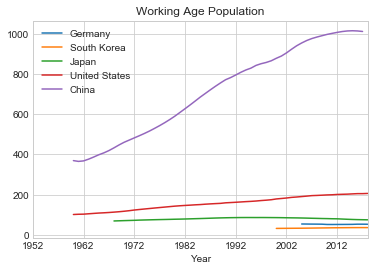

In [38]:
df_countries.plot(title='Working Age Population')

In [39]:
df_temp = df_countries.copy()

In [40]:
# Normalize data
df_temp2 = (df_temp - df_temp.min()) / (df_temp.max() - df_temp.min())

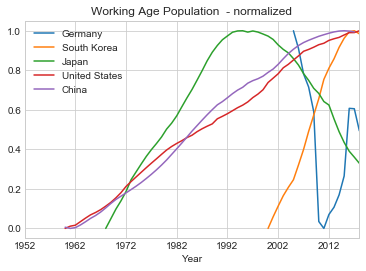

In [41]:
df_temp2.plot(title='Working Age Population  - normalized')

In [42]:
df_temp3 = (df_temp / df_temp.max()) * 100

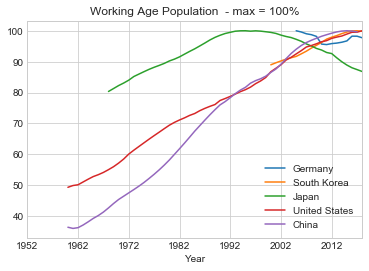

In [43]:
df_temp3.plot(title='Working Age Population  - max = 100%')

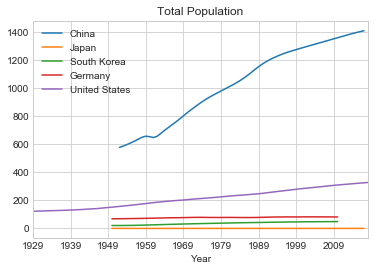

In [44]:
df_countries_total.plot(title='Total Population')

In [45]:
df_countries_total

,China,Japan,South Korea,Germany,United States
Year,,,,,
1929,NaN,NaN,NaN,NaN,121.878
1930,NaN,NaN,NaN,NaN,123.188
1931,NaN,NaN,NaN,NaN,124.149
1932,NaN,NaN,NaN,NaN,124.949
1933,NaN,NaN,NaN,NaN,125.690
...,...,...,...,...,...
2014,1390.110352,0.128163,NaN,NaN,318.717
2015,1397.028564,0.127975,NaN,NaN,321.026
2016,1403.500366,0.127749,NaN,NaN,323.317
